In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
import warnings
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
d=load_digits()

In [3]:
#to ignore warning messages
warnings.filterwarnings('ignore')

In [4]:

d.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
dir(d)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
#first image
d.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

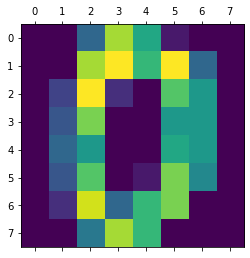

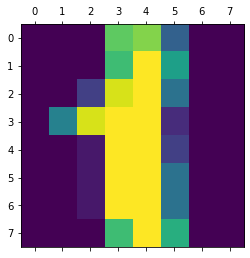

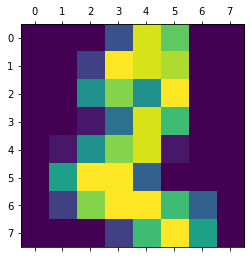

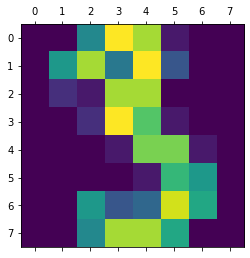

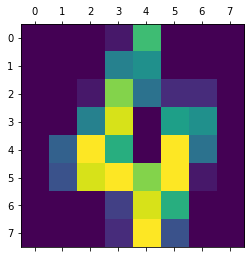

In [7]:
#showing some images
for i in range(5):
    plt.matshow(d.images[i])
    plt.show()

In [8]:
#making dataframe just for simplicity
x=pd.DataFrame(d.data)
y=pd.DataFrame(d.target)



,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
print(x.shape)
print(y.shape)

(1797, 64)
(1797, 1)


In [11]:
#train-test split
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [49]:
#import different models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [59]:
l=LogisticRegression()
r=RandomForestClassifier()
k=KNeighborsClassifier()
s=SVC()


In [60]:
#function to predict score for different models
def fg(x_train,y_train,x_test,y_test,model):
    d={}
    model.fit(x_train,y_train)
    model.predict(x_test)
    score=model.score(x_test,y_test)
    d[model]=score
    print(d)
    
    
    
    
    

In [61]:
#giving model one by one
model=[k,l,r,s]
for i in model:
    fg(x_train,y_train,x_test,y_test,i)

{KNeighborsClassifier(): 0.9861111111111112}
{LogisticRegression(): 0.9527777777777777}
{RandomForestClassifier(): 0.9666666666666667}
{SVC(): 0.9916666666666667}


In [62]:
#store prediction of different variable
logisticprediction=l.predict(x_test)
randomclassifierpredictions=r.predict(x_test)
knnpredictions=k.predict(x_test)
svmprediction=s.predict(x_test)

In [63]:
#to visulaise the performance of model 
def plot(title,y_test,y_pre):
    c=confusion_matrix(y_test,y_pre)
    plt.figure(figsize=(6,6))
    plt.title(title)

    sns.heatmap(c,annot=True)
    plt.xlabel("predicted")
    plt.ylabel("truth")

    plt.show()

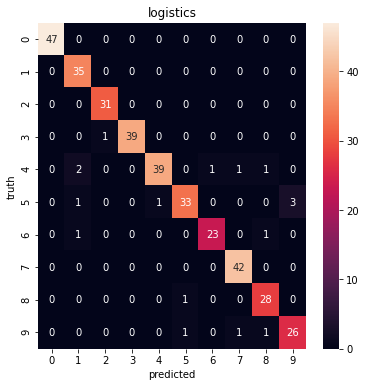

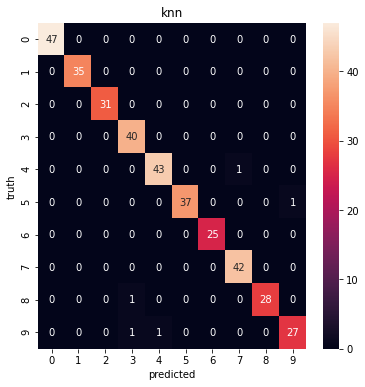

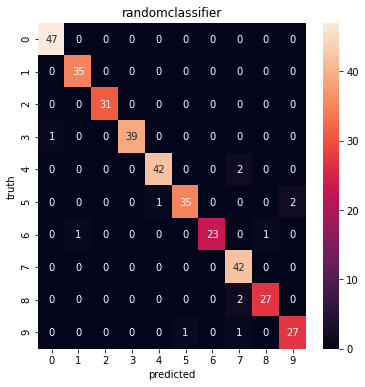

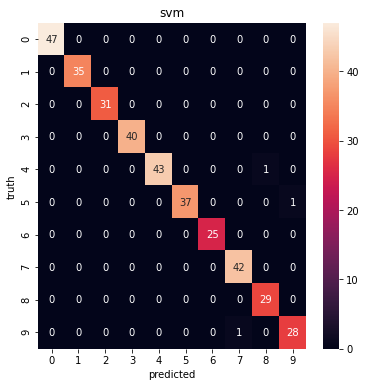

In [64]:
plot('logistics',y_test,logisticprediction)
plot('knn',y_test,knnpredictions)
plot('randomclassifier',y_test,randomclassifierpredictions)
plot('svm',y_test,svmprediction)

In [66]:
#cross validation
def cross(model,x,y):
    av=cross_val_score(model,x,y,cv=5)
    print(f" average score of {model} is {av.mean()}")

In [67]:
for i in model:
    cross(i,x,y)
    

 average score of KNeighborsClassifier() is 0.9627282575054161
 average score of LogisticRegression() is 0.9137650882079852
 average score of RandomForestClassifier() is 0.937137109254101
 average score of SVC() is 0.9632838130609718


###use one algorithm and do some hyperparameter tuning to improve accuracy